<a href="https://colab.research.google.com/github/hackinghub2/ML_SEM7_LAB/blob/main/Jatin_Talekar_ML_Lab_Exp-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sahil Churi
Rollno.: 21102B0049
BE CMPN B

---
Experiment 5 : XGBoost

---
Github : https://github.com/Saahil3/ML-Lab-Experiments


In [1]:
!pip install xgboost scikit-learn matplotlib


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
url_classification = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url_classification, header=None, names=columns)

# Preprocess
X_classification = data.drop(columns=['ID', 'Diagnosis'])
y_classification = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Split the dataset
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


In [4]:
# Load dataset
url_regression = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data_regression = pd.read_csv(url_regression)

# Preprocess
X_regression = data_regression.drop(columns=['median_house_value'])
y_regression = data_regression['median_house_value']

# Split the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [5]:
# Create XGBoost classifier model
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
clf.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_clf = clf.predict(X_test_clf)

# Evaluate performance
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
roc_auc = roc_auc_score(y_test_clf, clf.predict_proba(X_test_clf)[:, 1])

print(f"Classification Metrics:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1-Score: {f1}\n ROC AUC: {roc_auc}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:07:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Metrics:
 Accuracy: 0.956140350877193
 Precision: 0.9523809523809523
 Recall: 0.9302325581395349
 F1-Score: 0.9411764705882353
 ROC AUC: 0.9908286930887651


In [6]:
# Convert 'ocean_proximity' to a categorical type
data_regression['ocean_proximity'] = data_regression['ocean_proximity'].astype('category')

# Preprocess
X_regression = data_regression.drop(columns=['median_house_value'])
y_regression = data_regression['median_house_value']

# Split the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create XGBoost regressor model with enable_categorical
reg = XGBRegressor(use_label_encoder=False, enable_categorical=True)

# Train the model
reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg.predict(X_test_reg)

# Evaluate performance
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression Metrics:\n Mean Squared Error: R-squared: {r2}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Regression Metrics:
 Mean Squared Error: R-squared: 0.8201193822279835


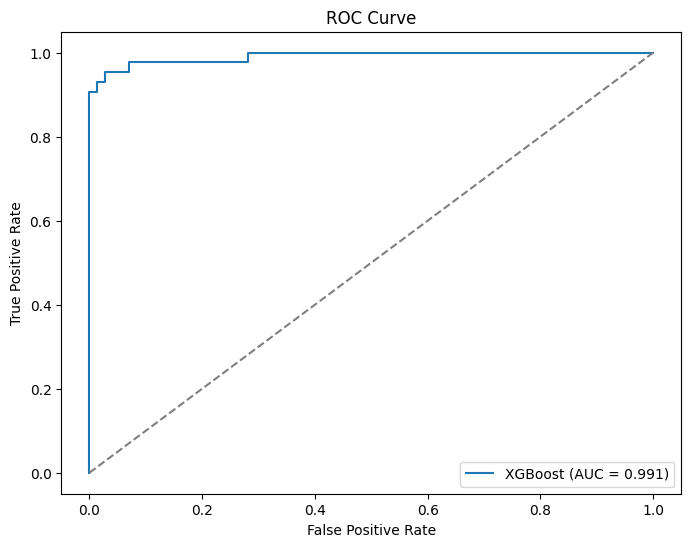

In [7]:
# Plot ROC Curve for Classification
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_clf, clf.predict_proba(X_test_clf)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

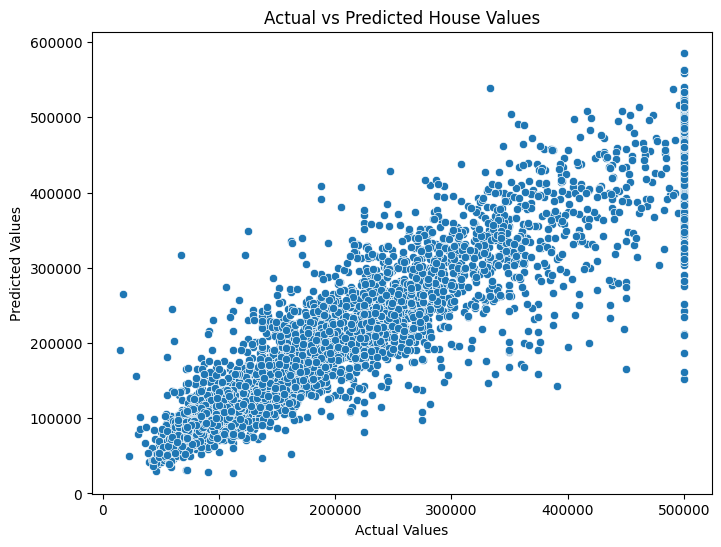

In [8]:
# Plot Actual vs Predicted for Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()